# [ 데이터 EDA ]
---

In [1]:
# 모듈 로딩
from IPython.display import Image
import os
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

## 1_전체 Dataset 용량
---

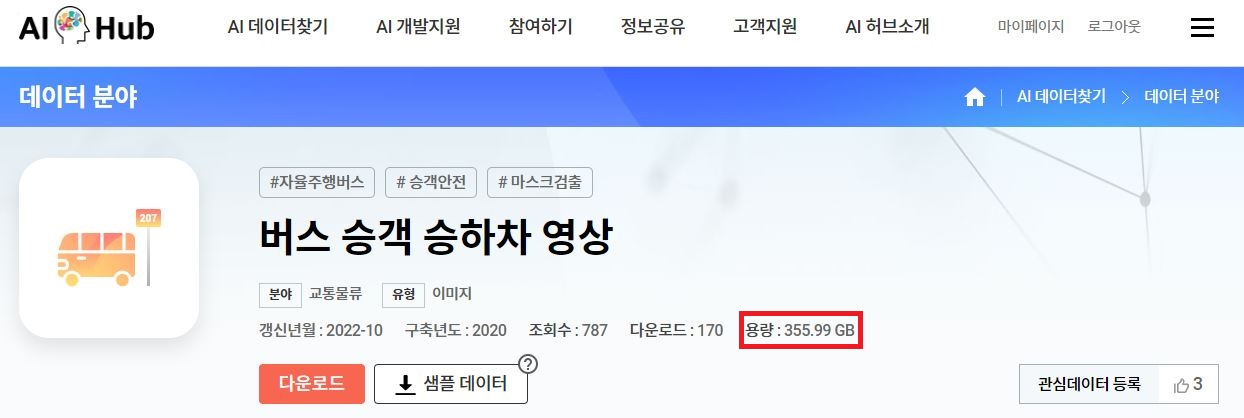

In [3]:
os.getcwd() # 디렉터리 위치 리턴
os.chdir(r'C:\HCB\ChaeBeom')
Image('./00_img/1_데이터_용량.jpg')

## 2_버스 카메라 위치
---

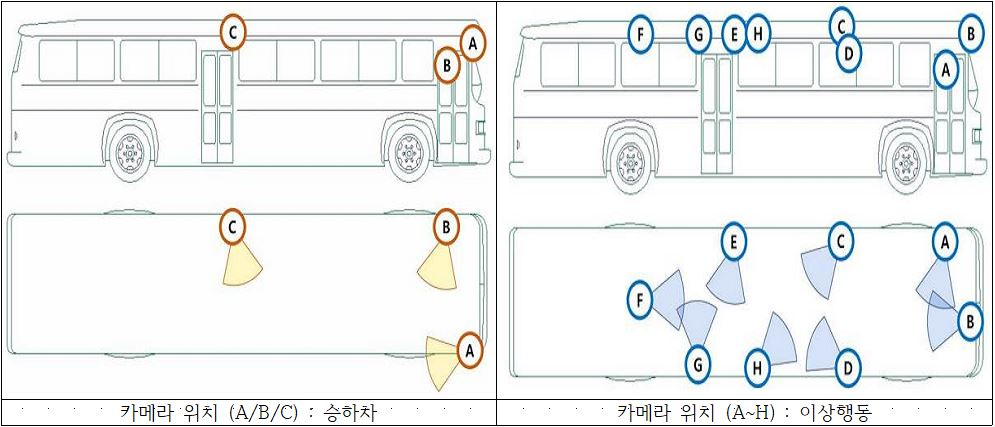

In [4]:
Image('./00_img/03_버스카메라.jpg')

## 3_파일 구성
---
* (Train, Validation) x (원천, 라벨)
* 원천과 라벨 각각
    * Train = A/B/C (9개), acci/mask/vio (3개)
    * Validation = A/B/C (3개), acci/mask/vio (3개)  

### ==> ('mask' 파일은 제외) 라벨 data만 사용

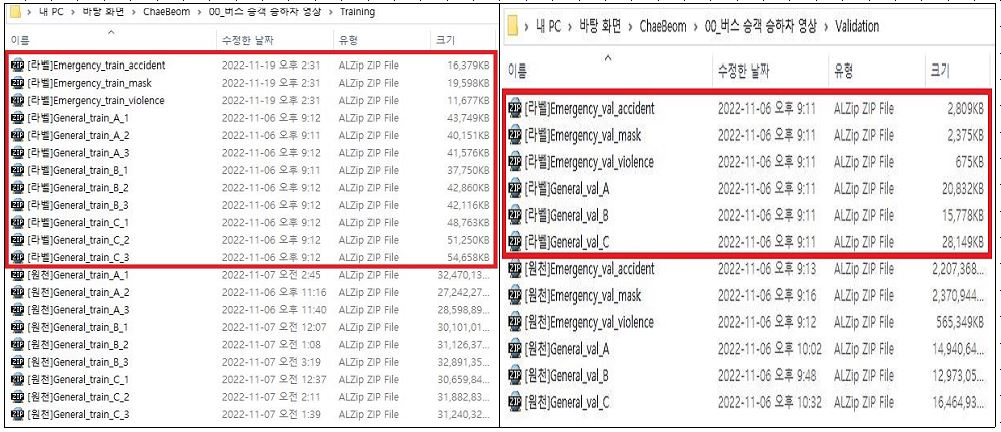

In [5]:
Image('./00_img/02_파일구성.jpg')

***

### 3-1_원천데이터 (jpg)
___
* 프레임 단위의 이미지 (3fps), (1920 * 1080)
* 승하차 (A/B/C) : 828,000 장
* 이상행동 (A~H) : 61,840장  

### ==> 총 약 90만장

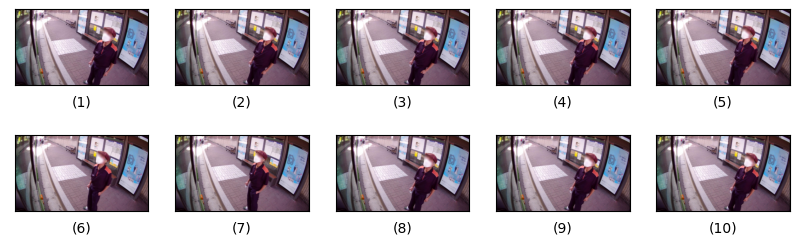

In [8]:
# 원천 데이터
import os
os.getcwd() # 디렉터리 위치 리턴
os.chdir(r'C:\HCB\ChaeBeom\00_img\sample1')

fig = plt.figure(figsize=(10,3)) 
rows = 2
cols = 5
i = 1
 
xlabels = ["xlabel", "(1)", "(2)", "(3)", "(4)", "(5)", "(6)", "(7)", "(8)", "(9)", "(10)"]

import glob
for filename in glob.glob("*.jpg"):
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1

plt.tight_layout
plt.show()

* 승하차 관련 (A/B/C)
    - 3ch / 평균 40초 / 3fps 이미지 추출 / 채널당 평균 2300 클립
    - 승하차 이미지 수 = 3ch * 40s * 3fps * 2300 = 828,000 장    

* 이상행동 관련 (A~H)
    - 8ch / 평균 45초 / 3fps 이미지 추출 / 6개 시나리오 / 시나리오 당 6회 촬영 (배우변경)
    - 8ch / 평균 20초 / 3fps 이미지 추출 / 6개 시나리오 / 시나리오 당 8회 반복 (배우변경)  
  
    - 폭행 이미지 수 = 8ch * 45s * 3fps * 6 * 6 = 38,800 장
    - 사고 이미지 수 = 8ch * 20s * 3fps * 6 * 8 = 23,040 장  

* ### 총 889,840 장 (약 90만장)

---

### [ Training ]

### 3-2_라벨 데이터 (json)
---
* 사용할 값들 : 'annotatins'의 [ 'bbox', 'keypoints', 'action', 'get_on', 'get_off' ]
* json에서 필요한 값들만 dataframe으로 만들어 사용 -> csv파일로 활용
* keypoints : 16개의 점인데 48개의 값 -> 3차원
* action : 상황에 맞게 라벨 인코딩 (8)
* get_on과 get_off : 상황에 맞게 라벨 인코딩 (3)

In [11]:
os.chdir(r'C:\HCB\ChaeBeom\01_data')
# os.getcwd()

with open('./[apt]attend_008A_0.json', 'r') as f:
    json_data = json.load(f)
print(json.dumps(json_data, indent="\t") )

{
	"info": {
		"description": "AIHub Bus Passenger Dataset",
		"year": 2020,
		"version": "1.0",
		"img_path": "",
		"width": 1920,
		"height": 1080,
		"G-Sensor": "88,-29,920",
		"Gyro": "0,0,0"
	},
	"annotations": [
		{
			"id": 0,
			"bbox": [
				974,
				266,
				1471,
				1077
			],
			"occluded": true,
			"num_keypoints": 16,
			"keypoints": [
				1074,
				1020,
				2,
				1111,
				923,
				2,
				1151,
				752,
				2,
				1266,
				829,
				2,
				1180,
				1012,
				2,
				1371,
				1077,
				0,
				1193,
				798,
				2,
				1248,
				643,
				2,
				1334,
				462,
				2,
				1320,
				342,
				2,
				1102,
				736,
				2,
				1148,
				649,
				2,
				1225,
				456,
				2,
				1442,
				563,
				2,
				1407,
				763,
				2,
				1334,
				889,
				2
			],
			"action": "stand",
			"age": "elder",
			"disabled": false,
			"mask": true,
			"get_on": true,
			"get_off": false
		}
	]
}


In [12]:
# keys = [ key for key in json_data ]
# values = [ value for value in keys ]
# print(values)

for key, val in json_data.items():
    print(key, val)

info {'description': 'AIHub Bus Passenger Dataset', 'year': 2020, 'version': '1.0', 'img_path': '', 'width': 1920, 'height': 1080, 'G-Sensor': '88,-29,920', 'Gyro': '0,0,0'}
annotations [{'id': 0, 'bbox': [974, 266, 1471, 1077], 'occluded': True, 'num_keypoints': 16, 'keypoints': [1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 1266, 829, 2, 1180, 1012, 2, 1371, 1077, 0, 1193, 798, 2, 1248, 643, 2, 1334, 462, 2, 1320, 342, 2, 1102, 736, 2, 1148, 649, 2, 1225, 456, 2, 1442, 563, 2, 1407, 763, 2, 1334, 889, 2], 'action': 'stand', 'age': 'elder', 'disabled': False, 'mask': True, 'get_on': True, 'get_off': False}]


In [13]:
# json파일 'annotations'에 속한 내용
# json_data['annotations'][0]
print(json.dumps(json_data['annotations'][0], indent="\t") )

{
	"id": 0,
	"bbox": [
		974,
		266,
		1471,
		1077
	],
	"occluded": true,
	"num_keypoints": 16,
	"keypoints": [
		1074,
		1020,
		2,
		1111,
		923,
		2,
		1151,
		752,
		2,
		1266,
		829,
		2,
		1180,
		1012,
		2,
		1371,
		1077,
		0,
		1193,
		798,
		2,
		1248,
		643,
		2,
		1334,
		462,
		2,
		1320,
		342,
		2,
		1102,
		736,
		2,
		1148,
		649,
		2,
		1225,
		456,
		2,
		1442,
		563,
		2,
		1407,
		763,
		2,
		1334,
		889,
		2
	],
	"action": "stand",
	"age": "elder",
	"disabled": false,
	"mask": true,
	"get_on": true,
	"get_off": false
}


In [14]:
# 필요한 것만 뽑아본다면
val = ['bbox', 'keypoints', 'action', 'get_on', 'get_off']

for n in val:
    print('{} : {}'.format(n, json_data['annotations'][0][n]))
print('skeletonpoint 갯수 : {}개'.format(json_data['annotations'][0]['num_keypoints']))

# 여기에 [get_num] 과 [ act_num ]을 매겨서 라벨링

bbox : [974, 266, 1471, 1077]
keypoints : [1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 1266, 829, 2, 1180, 1012, 2, 1371, 1077, 0, 1193, 798, 2, 1248, 643, 2, 1334, 462, 2, 1320, 342, 2, 1102, 736, 2, 1148, 649, 2, 1225, 456, 2, 1442, 563, 2, 1407, 763, 2, 1334, 889, 2]
action : stand
get_on : True
get_off : False
skeletonpoint 갯수 : 16개


### 3-2-1_라벨 데이터 활용 예시(df로 변환)

In [15]:
keypoints = []
action = []
act_num = [0]
get_on = []
get_off = []
get_num = [1]

with open('./[apt]attend_008A_0.json', 'r') as f:
    json_data = json.load(f)
    if len(json_data['annotations']) != 0:
        keypoints.append(json_data['annotations'][0]['keypoints'])
        action.append(json_data['annotations'][0]['action'])
        get_on.append(json_data['annotations'][0]['get_on'])
        get_off.append(json_data['annotations'][0]['get_off'])

In [16]:
df = pd.DataFrame({'keypoints':keypoints,
                   'get_on':get_on,
                   'get_off':get_off,
                   'get_num':get_num,
                   'action':action,
                   'act_num':act_num})

In [17]:
# 라벨링 : 하차(0), 승차(1), nothing(2)
# get_num = []

# for i in range(len(get_on)):
#     if (df['get_on'][i] == False) and (df['get_off'][i] == False):
#         get.append(2)
#     elif (df['get_on'][i] == True) and (df['get_off'][i] == False):
#         get.append(1)
#     else:
#         get.append(0)

In [18]:
# 라벨인코딩 -> 승차(1)인 경우, 서있는 stand(0)인 경우
df

,keypoints,get_on,get_off,get_num,action,act_num
0,"[1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 12...",True,False,1,stand,0


## 4_라벨별 분포

### 4-1_카메라(A)

In [22]:
# 카메라(A)
os.getcwd() # 디렉터리 위치 리턴
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Training\[라벨]General_train_A')

keypoints_a = []
get_on_a = []
get_off_a = []
folder_list_a = []

PATH = './'

# A카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    a_list = os.listdir(PATH+i)
    
    for n in a_list:
        folder_list = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_a.append(json_data['annotations'][0]['keypoints'])
                    get_on_a.append(json_data['annotations'][0]['get_on'])
                    get_off_a.append(json_data['annotations'][0]['get_off']) 

### 4-2_카메라(B)

In [23]:
# 카메라(B)
# os.getcwd() # 디렉터리 위치 리턴
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Training\[라벨]General_train_B')

keypoints_b = []
get_on_b = []
get_off_b = []
folder_list_b = []

PATH = './'

# B카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    b_list = os.listdir(PATH+i)
    
    for n in b_list:
        folder_list_b = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list_b:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_b.append(json_data['annotations'][0]['keypoints'])
                    get_on_b.append(json_data['annotations'][0]['get_on'])
                    get_off_b.append(json_data['annotations'][0]['get_off']) 

### 4-3_카메라(C)

In [24]:
# 카메라(C)
os.getcwd() # 디렉터리 위치 리턴
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Training\[라벨]General_train_C')

keypoints_c = []
get_on_c = []
get_off_c = []
folder_list_c = []

PATH = './'

# C카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    c_list = os.listdir(PATH+i)
    
    for n in c_list:
        folder_list_c = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list_c:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_c.append(json_data['annotations'][0]['keypoints'])
                    get_on_c.append(json_data['annotations'][0]['get_on'])
                    get_off_c.append(json_data['annotations'][0]['get_off']) 

### 4-4_카메라(A~H) : accident

In [25]:
# 카메라(A~H) : accident
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Training\[라벨]Emergency_train_accident')

keypoints_d = []
action_d = []
folder_list_d = []

PATH = './'

# A~H카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    d_list = os.listdir(PATH+i)
    
    for n in d_list:
        folder_list_d = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list_d:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_d.append(json_data['annotations'][0]['keypoints'])
                    action_d.append(json_data['annotations'][0]['action'])

### 4-5_카메라(A~H) : violence

In [26]:
# 카메라(A~H) : violence
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Training\[라벨]Emergency_train_violence')

keypoints_e = []
action_e = []
folder_list_e = []

PATH = './'

# A~H카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    e_list = os.listdir(PATH+i)
    
    for n in e_list:
        folder_list_e = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list_e:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_e.append(json_data['annotations'][0]['keypoints'])
                    action_e.append(json_data['annotations'][0]['action'])

## 5_카메라별 DataFrame 만들기

### 5-1_카메라(A)

In [27]:
df_a = pd.DataFrame({'keypoints':keypoints_a,
                   'get_on':get_on_a,
                   'get_off':get_off_a})

In [28]:
get_num_a = []

# 0:get_off , 1:get_on , 2: nothing
for i in range(len(get_on_a)):
    if (df_a['get_on'][i] == False) and (df_a['get_off'][i] == False):
        get_num_a.append(2)
    elif (df_a['get_on'][i] == True) and (df_a['get_off'][i] == False):
        get_num_a.append(1)
    else:
        get_num_a.append(0)

df_a['get_num'] = get_num_a

In [29]:
df_a

,keypoints,get_on,get_off,get_num
0,"[1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 12...",True,False,1
1,"[1094, 918, 2, 1131, 802, 2, 1185, 643, 2, 131...",True,False,1
2,"[1085, 909, 2, 1118, 787, 2, 1174, 634, 2, 129...",True,False,1
3,"[1082, 908, 2, 1113, 786, 2, 1155, 627, 2, 127...",True,False,1
4,"[1071, 904, 2, 1102, 782, 2, 1144, 623, 2, 127...",True,False,1
...,...,...,...,...
97978,"[1216, 172, 2, 1222, 148, 2, 1216, 105, 2, 124...",False,False,2
97979,"[1117, 149, 2, 1119, 126, 2, 1116, 85, 2, 1134...",False,False,2
97980,"[1042, 133, 2, 1037, 109, 2, 1034, 73, 2, 1050...",False,False,2
97981,"[971, 115, 2, 971, 94, 2, 965, 60, 2, 981, 56,...",False,False,2


In [30]:
# A카메라 라벨 상태
df_a_0 = df_a[df_a['get_num']==0]
df_a_1 = df_a[df_a['get_num']==1]
df_a_2 = df_a[df_a['get_num']==2]

# 라벨 분포 개수 확인
print(len(df_a_0), len(df_a_1), len(df_a_2))
print(len(df_a) == len(df_a_0)+len(df_a_1)+len(df_a_2))

35024 12319 50640
True


### 5-2_카메라(B)

In [31]:
df_b = pd.DataFrame({'keypoints':keypoints_b,
                   'get_on':get_on_b,
                   'get_off':get_off_b})

In [32]:
get_num_b = []

# 0:get_off , 1:get_on , 2: nothing
for i in range(len(get_on_b)):
    if (df_b['get_on'][i] == False) and (df_b['get_off'][i] == False):
        get_num_b.append(2)
    elif (df_b['get_on'][i] == True) and (df_b['get_off'][i] == False):
        get_num_b.append(1)
    else:
        get_num_b.append(0)

df_b['get_num'] = get_num_b

In [33]:
df_b

,keypoints,get_on,get_off,get_num
0,"[1019, 540, 2, 974, 461, 2, 997, 383, 1, 1110,...",False,False,2
1,"[1019, 541, 2, 989, 466, 2, 990, 394, 1, 1108,...",False,False,2
2,"[1022, 548, 2, 984, 474, 2, 1005, 399, 2, 1114...",False,False,2
3,"[1021, 547, 2, 983, 474, 2, 1004, 398, 2, 1113...",False,False,2
4,"[1021, 548, 2, 983, 474, 2, 1004, 399, 2, 1113...",False,False,2
...,...,...,...,...
127010,"[764, 1049, 1, 792, 974, 1, 742, 776, 1, 860, ...",True,False,1
127011,"[779, 1034, 1, 780, 938, 1, 767, 770, 1, 877, ...",True,False,1
127012,"[856, 1048, 1, 866, 964, 1, 842, 779, 1, 941, ...",True,False,1
127013,"[1079, 1048, 1, 1113, 933, 1, 1022, 769, 1, 10...",True,False,1


In [34]:
# B카메라 라벨 상태
df_b_0 = df_b[df_b['get_num']==0]
df_b_1 = df_b[df_b['get_num']==1]
df_b_2 = df_b[df_b['get_num']==2]

# 라벨 분포 개수 확인
print(len(df_b_0), len(df_b_1), len(df_b_2))
print(len(df_b) == len(df_b_0)+len(df_b_1)+len(df_b_2))

1355 32019 93641
True


### 5-3_카메라(C)

In [35]:
df_c = pd.DataFrame({'keypoints':keypoints_c,
                   'get_on':get_on_c,
                   'get_off':get_off_c})

In [36]:
get_num_c = []

# 0:get_off , 1:get_on , 2: nothing
for i in range(len(get_on_c)):
    if (df_c['get_on'][i] == False) and (df_c['get_off'][i] == False):
        get_num_c.append(2)
    elif (df_c['get_on'][i] == True) and (df_c['get_off'][i] == False):
        get_num_c.append(1)
    else:
        get_num_c.append(0)

df_c['get_num'] = get_num_c

In [37]:
df_c

,keypoints,get_on,get_off,get_num
0,"[1450, 614, 1, 1400, 472, 2, 1466, 376, 2, 157...",False,False,2
1,"[1457, 606, 1, 1394, 477, 2, 1463, 376, 2, 157...",False,False,2
2,"[1447, 609, 1, 1395, 480, 2, 1463, 376, 2, 157...",False,False,2
3,"[1447, 609, 1, 1395, 480, 2, 1466, 372, 2, 157...",False,False,2
4,"[1447, 609, 1, 1395, 480, 2, 1462, 372, 2, 157...",False,False,2
...,...,...,...,...
170516,"[1135, 596, 1, 1148, 472, 1, 1160, 432, 1, 123...",False,False,2
170517,"[1135, 596, 1, 1148, 472, 1, 1160, 432, 1, 123...",False,False,2
170518,"[1135, 596, 1, 1148, 472, 1, 1160, 432, 1, 123...",False,False,2
170519,"[1135, 596, 1, 1148, 472, 1, 1160, 432, 1, 123...",False,False,2


In [38]:
# C카메라 라벨 상태
df_c_0 = df_c[df_c['get_num']==0]
df_c_1 = df_c[df_c['get_num']==1]
df_c_2 = df_c[df_c['get_num']==2]

# 라벨 분포 개수 확인
print(len(df_c_0), len(df_c_1), len(df_c_2))
print(len(df_c) == len(df_c_0)+len(df_c_1)+len(df_c_2))

59132 4691 106698
True


### 5-4_카메라(A~H) : accident

In [39]:
df_d = pd.DataFrame({'keypoints':keypoints_d,
                   'action':action_d})

In [40]:
df_d

,keypoints,action
0,"[821, 1075, 0, 740, 986, 1, 979, 1014, 2, 1292...",sit down
1,"[945, 515, 2, 936, 433, 2, 933, 344, 2, 973, 3...",stand
2,"[814, 1024, 1, 842, 844, 1, 831, 665, 2, 921, ...",walk
3,"[822, 1075, 0, 724, 973, 2, 980, 1014, 2, 1294...",sit down
4,"[822, 1075, 0, 724, 973, 2, 980, 1014, 2, 1294...",sit down
...,...,...
17411,"[1084, 660, 2, 1089, 601, 2, 1098, 485, 2, 116...",grab handle
17412,"[1159, 648, 2, 1178, 535, 2, 1080, 465, 2, 114...",walk
17413,"[1116, 695, 2, 1148, 583, 2, 1101, 496, 2, 115...",grab handle
17414,"[759, 1020, 0, 808, 946, 0, 811, 824, 0, 712, ...",walk


In [44]:
act_num_d = []

# 0:stand, 1:walk, 2:run, 3:sit down, 4:lay down, 5:grab handle, 6:kick, 7:punch
for i in range(len(df_d['action'])):
    if (df_d['action'][i] == 'stand'):
        act_num_d.append(0)
    elif (df_d['action'][i] == 'walk'):
        act_num_d.append(1)
    elif (df_d['action'][i] == 'run'):
        act_num_d.append(2)
    elif (df_d['action'][i] == 'sit down'):
        act_num_d.append(3)
    elif (df_d['action'][i] == 'lay down'):
        act_num_d.append(4)
    elif (df_d['action'][i] == 'grab handle'):
        act_num_d.append(5)
    elif (df_d['action'][i] == 'kick'):
        act_num_d.append(6)
#     elif (df_d['action'][i] == 'punch'):
#         get_num_d.append(7)
    else:
        act_num_d.append(7)

df_d['act_num'] = act_num_d

In [46]:
# 라벨별 이름 및 개수 확인
print(df_d['action'].unique())
print(len(df_d['action']))
print(len(df_d[df_d['action']== 'sit down']))
print(len(df_d[df_d['action']== 'stand']))
print(len(df_d[df_d['action']== 'walk']))
print(len(df_d[df_d['action']== 'grab handle']))
print(len(df_d[df_d['action']== 'lay down']))
print(len(df_d[df_d['action']== 'punch']))
len(act_num_d)

['sit down' 'stand' 'walk' 'grab handle' 'lay down' 'punch']
17416
5417
2831
4362
2409
2394
3


17416

In [47]:
df_d

,keypoints,action,act_num
0,"[821, 1075, 0, 740, 986, 1, 979, 1014, 2, 1292...",sit down,3
1,"[945, 515, 2, 936, 433, 2, 933, 344, 2, 973, 3...",stand,0
2,"[814, 1024, 1, 842, 844, 1, 831, 665, 2, 921, ...",walk,1
3,"[822, 1075, 0, 724, 973, 2, 980, 1014, 2, 1294...",sit down,3
4,"[822, 1075, 0, 724, 973, 2, 980, 1014, 2, 1294...",sit down,3
...,...,...,...
17411,"[1084, 660, 2, 1089, 601, 2, 1098, 485, 2, 116...",grab handle,5
17412,"[1159, 648, 2, 1178, 535, 2, 1080, 465, 2, 114...",walk,1
17413,"[1116, 695, 2, 1148, 583, 2, 1101, 496, 2, 115...",grab handle,5
17414,"[759, 1020, 0, 808, 946, 0, 811, 824, 0, 712, ...",walk,1


In [48]:
# A~H카메라 라벨 상태
df_d_0 = df_d[df_d['act_num']==0]
df_d_1 = df_d[df_d['act_num']==1]
df_d_2 = df_d[df_d['act_num']==2]
df_d_3 = df_d[df_d['act_num']==3]
df_d_4 = df_d[df_d['act_num']==4]
df_d_5 = df_d[df_d['act_num']==5]
df_d_6 = df_d[df_d['act_num']==6]
df_d_7 = df_d[df_d['act_num']==7]

# 라벨 분포 개수 확인
print(len(df_d_0), len(df_d_1), len(df_d_2), len(df_d_3), len(df_d_4), len(df_d_5), len(df_d_6), len(df_d_7))
print(len(df_d) == len(df_d_0)+len(df_d_1)+len(df_d_2)+len(df_d_3)+len(df_d_4)+len(df_d_5)+len(df_d_6)+len(df_d_7))

2831 4362 0 5417 2394 2409 0 3
True


### 5-5_카메라(A~H) : violence

In [49]:
df_e = pd.DataFrame({'keypoints':keypoints_e,
                   'action':action_e})

In [50]:
df_e

,keypoints,action
0,"[703, 1061, 1, 735, 1034, 2, 1018, 1041, 2, 11...",sit down
1,"[691, 1058, 1, 738, 1031, 2, 1006, 1039, 2, 13...",sit down
2,"[725, 1057, 1, 722, 1017, 2, 993, 1032, 2, 115...",sit down
3,"[733, 1067, 1, 745, 1042, 2, 1000, 1044, 1, 13...",sit down
4,"[872, 899, 1, 870, 753, 1, 864, 687, 1, 1050, ...",stand
...,...,...
11720,"[986, 856, 2, 975, 754, 2, 998, 648, 2, 1054, ...",walk
11721,"[991, 842, 2, 934, 795, 2, 921, 692, 2, 980, 6...",walk
11722,"[946, 863, 1, 890, 830, 1, 854, 779, 2, 929, 7...",walk
11723,"[730, 1073, 0, 761, 1074, 2, 749, 926, 2, 876,...",walk


In [51]:
df_e['action'].unique()

array(['sit down', 'stand', 'punch', 'walk', 'run', 'kick', 'grab handle',
       'lay down'], dtype=object)

In [52]:
len(df_e['action'])

11725

In [54]:
act_num_e = []

# 0:stand, 1:walk, 2:run, 3:sit down, 4:lay down, 5:grab handle, 6:kick, 7:punch
for i in range(len(df_e['action'])):
    if (df_e['action'][i] == 'stand'):
        act_num_e.append(0)
    elif (df_e['action'][i] == 'walk'):
        act_num_e.append(1)
    elif (df_e['action'][i] == 'run'):
        act_num_e.append(2)
    elif (df_e['action'][i] == 'sit down'):
        act_num_e.append(3)
    elif (df_e['action'][i] == 'lay down'):
        act_num_e.append(4)
    elif (df_e['action'][i] == 'grab handle'):
        act_num_e.append(5)
    elif (df_e['action'][i] == 'kick'):
        act_num_e.append(6)
#     elif (df_d['action'][i] == 'punch'):
#         act_num_e.append(7)
    else:
        act_num_e.append(7)

df_e['act_num'] = act_num_e

In [55]:
# 라벨별 이름 및 개수 확인
print(len(df_e['action']))
print(len(df_e[df_e['action']== 'sit down']))
print(len(df_e[df_e['action']== 'stand']))
print(len(df_e[df_e['action']== 'walk']))
print(len(df_e[df_e['action']== 'grab handle']))
print(len(df_e[df_e['action']== 'lay down']))
print(len(df_e[df_e['action']== 'punch']))
len(act_num_e)

11725
4877
3048
1492
77
653
1290


11725

In [56]:
df_e

,keypoints,action,act_num
0,"[703, 1061, 1, 735, 1034, 2, 1018, 1041, 2, 11...",sit down,3
1,"[691, 1058, 1, 738, 1031, 2, 1006, 1039, 2, 13...",sit down,3
2,"[725, 1057, 1, 722, 1017, 2, 993, 1032, 2, 115...",sit down,3
3,"[733, 1067, 1, 745, 1042, 2, 1000, 1044, 1, 13...",sit down,3
4,"[872, 899, 1, 870, 753, 1, 864, 687, 1, 1050, ...",stand,0
...,...,...,...
11720,"[986, 856, 2, 975, 754, 2, 998, 648, 2, 1054, ...",walk,1
11721,"[991, 842, 2, 934, 795, 2, 921, 692, 2, 980, 6...",walk,1
11722,"[946, 863, 1, 890, 830, 1, 854, 779, 2, 929, 7...",walk,1
11723,"[730, 1073, 0, 761, 1074, 2, 749, 926, 2, 876,...",walk,1


In [57]:
# A~H카메라 라벨 상태
df_e_0 = df_e[df_e['act_num']==0]
df_e_1 = df_e[df_e['act_num']==1]
df_e_2 = df_e[df_e['act_num']==2]
df_e_3 = df_e[df_e['act_num']==3]
df_e_4 = df_e[df_e['act_num']==4]
df_e_5 = df_e[df_e['act_num']==5]
df_e_6 = df_e[df_e['act_num']==6]
df_e_7 = df_e[df_e['act_num']==7]

# 라벨 분포 개수 확인
print(len(df_e_0), len(df_e_1), len(df_e_2), len(df_e_3), len(df_e_4), len(df_e_5), len(df_e_6), len(df_e_7))
print(len(df_e) == len(df_e_0)+len(df_e_1)+len(df_e_2)+len(df_e_3)+len(df_e_4)+len(df_e_5)+len(df_e_6)+len(df_e_7))

3048 1492 114 4877 653 77 174 1290
True


---

### 6_카메라별 분포 그래프 그리기

### 6-1_승하차 : 카메라(A/B/C)

In [58]:
import warnings
warnings.filterwarnings(action='ignore')

label_a = ['get_off', 'get_on', 'nothing']
cam_a = [len(df_a_0) , len(df_a_1) , len(df_a_2)]
cam_b = [len(df_b_0) , len(df_b_1) , len(df_b_2)]
cam_c = [len(df_c_0) , len(df_c_1) , len(df_c_2)]

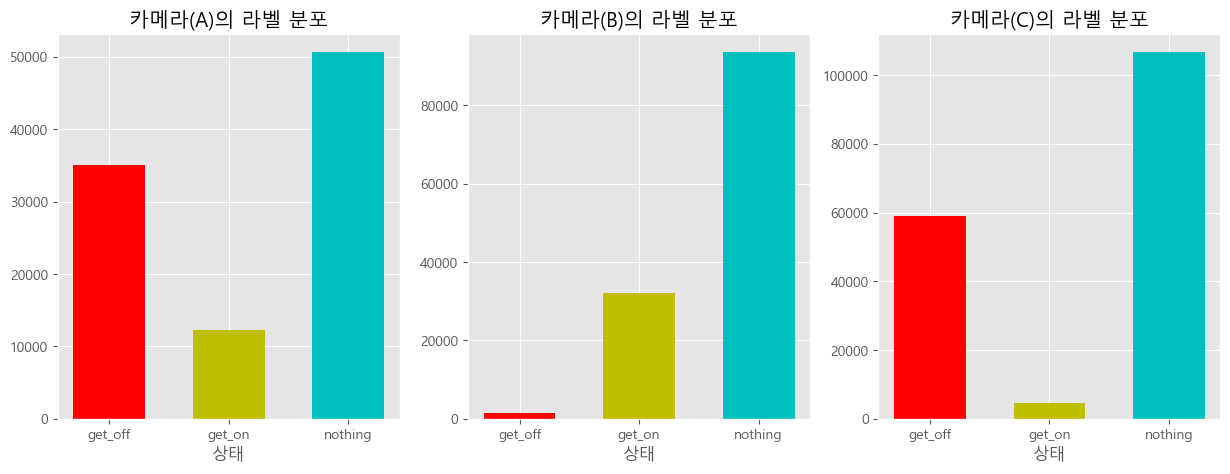

In [60]:
# 카메라(A/B/C) : 승하차 라벨 분포
plt.figure(figsize=[15,5])

plt.subplot(1, 3, 1)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_a, cam_a, color=['r','y','c'], label=label_a, width=0.6)
plt.title('카메라(A)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1, 3, 2)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_a, cam_b, color=['r','y','c'], label=label_a, width=0.6)
plt.title('카메라(B)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1, 3, 3)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_a, cam_c, color=['r','y','c'], label=label_a, width=0.6)
plt.title('카메라(C)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.show()

### 6-2_이상행동 : 카메라(A~H)

In [61]:
import warnings
warnings.filterwarnings(action='ignore')

label_de = ['stand', 'walk', 'run', 'sit down', 'lay down', 'grab handle', 'kick', 'punch']
cam_d = [len(df_d_0), len(df_d_1), len(df_d_2), len(df_d_3), len(df_d_4), len(df_d_5), len(df_d_6), len(df_d_7)]
cam_e = [len(df_e_0), len(df_e_1), len(df_e_2), len(df_e_3), len(df_e_4), len(df_e_5), len(df_e_6), len(df_e_7)]

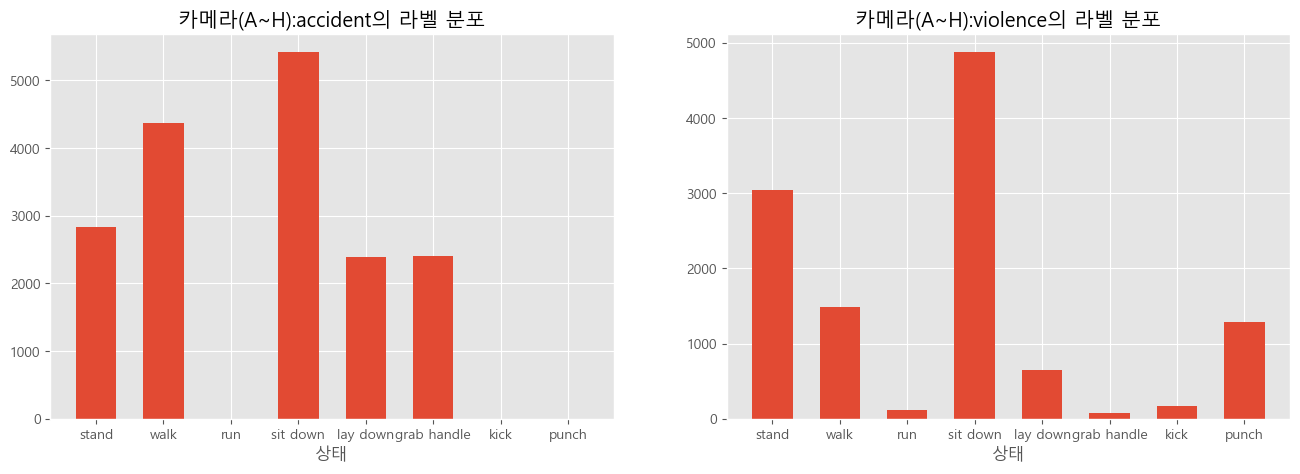

In [62]:
# 카메라(A~H) : 이상행동
plt.figure(figsize=[16,5])

plt.subplot(1, 2, 1)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_de, cam_d, label=label_de, width=0.6)
plt.title('카메라(A~H):accident의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1, 2, 2)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_de, cam_e, label=label_de, width=0.6)
plt.title('카메라(A~H):violence의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.show()

### [ Validation ]

## 4_라벨별 분포

### 4-1_카메라(A)

In [63]:
# 카메라(A)
os.getcwd() # 디렉터리 위치 리턴
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Validation\[라벨]General_val_A')

keypoints_aa = []
get_on_aa = []
get_off_aa = []
folder_list_aa = []

PATH = './'

# A카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    aa_list = os.listdir(PATH+i)
    
    for n in aa_list:
        folder_list = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_aa.append(json_data['annotations'][0]['keypoints'])
                    get_on_aa.append(json_data['annotations'][0]['get_on'])
                    get_off_aa.append(json_data['annotations'][0]['get_off']) 

### 4-2_카메라(B)

In [64]:
# 카메라(B)
os.getcwd() # 디렉터리 위치 리턴
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Validation\[라벨]General_val_B')

keypoints_bb = []
get_on_bb = []
get_off_bb = []
folder_list_bb = []

PATH = './'

# B카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    bb_list = os.listdir(PATH+i)
    
    for n in bb_list:
        folder_list = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_bb.append(json_data['annotations'][0]['keypoints'])
                    get_on_bb.append(json_data['annotations'][0]['get_on'])
                    get_off_bb.append(json_data['annotations'][0]['get_off']) 

### 4-3_카메라(C)

In [65]:
# 카메라(C)
os.getcwd() # 디렉터리 위치 리턴
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Validation\[라벨]General_val_C')

keypoints_cc = []
get_on_cc = []
get_off_cc = []
folder_list_cc = []

PATH = './'

# C카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    cc_list = os.listdir(PATH+i)
    
    for n in cc_list:
        folder_list = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_cc.append(json_data['annotations'][0]['keypoints'])
                    get_on_cc.append(json_data['annotations'][0]['get_on'])
                    get_off_cc.append(json_data['annotations'][0]['get_off']) 

### 4-4_카메라(A~H) : accident

In [66]:
# 카메라(A~H) : accident
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Validation\[라벨]Emergency_val_accident')

keypoints_dd = []
action_dd = []
folder_list_dd = []

PATH = './'

# A~H카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    dd_list = os.listdir(PATH+i)
    
    for n in dd_list:
        folder_list_dd = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list_dd:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_dd.append(json_data['annotations'][0]['keypoints'])
                    action_dd.append(json_data['annotations'][0]['action'])

### 4-5_카메라(A~H) : violence

In [67]:
# 카메라(A~H) : violence
os.chdir(r'C:\HCB\ChaeBeom\00_버스 승객 승하차 영상\Validation\[라벨]Emergency_val_violence')

keypoints_ee = []
action_ee = []
folder_list_ee = []

PATH = './'

# A~H카메라에 대한 모든 폴더명을 리스트에 담기
for i in os.listdir(PATH):
    ee_list = os.listdir(PATH+i)
    
    for n in ee_list:
        folder_list_ee = (os.listdir(PATH+i+'/'+n))
        
        for m in folder_list_ee:
            with open((PATH+i+'/'+n+'/'+m), "r") as j:
                json_data = json.loads(j.read())
                if len(json_data['annotations']) != 0:
                    keypoints_ee.append(json_data['annotations'][0]['keypoints'])
                    action_ee.append(json_data['annotations'][0]['action'])

## 5_카메라별 DataFrame 만들기

### 5-1_카메라(A)

In [68]:
df_aa = pd.DataFrame({'keypoints':keypoints_aa,
                   'get_on':get_on_aa,
                   'get_off':get_off_aa})

In [69]:
get_num_aa = []

# 0:get_off , 1:get_on , 2: nothing
for i in range(len(get_on_aa)):
    if (df_aa['get_on'][i] == False) and (df_aa['get_off'][i] == False):
        get_num_aa.append(2)
    elif (df_aa['get_on'][i] == True) and (df_aa['get_off'][i] == False):
        get_num_aa.append(1)
    else:
        get_num_aa.append(0)

df_aa['get_num'] = get_num_aa

In [70]:
df_aa

,keypoints,get_on,get_off,get_num
0,"[279, 703, 1, 337, 604, 2, 313, 413, 2, 314, 3...",False,True,0
1,"[348, 700, 2, 496, 705, 2, 469, 504, 2, 507, 4...",False,True,0
2,"[748, 880, 2, 695, 729, 2, 618, 529, 2, 692, 4...",False,True,0
3,"[800, 898, 2, 849, 780, 2, 852, 565, 2, 908, 5...",False,True,0
4,"[833, 892, 2, 989, 820, 2, 1044, 609, 2, 1107,...",False,True,0
...,...,...,...,...
16488,"[1058, 189, 2, 1059, 154, 2, 1056, 115, 2, 103...",False,False,2
16489,"[992, 168, 1, 997, 138, 1, 1000, 110, 2, 986, ...",False,False,2
16490,"[943, 256, 1, 935, 225, 1, 927, 185, 2, 934, 1...",False,False,2
16491,"[1668, 453, 2, 1663, 399, 2, 1683, 350, 2, 171...",False,False,2


In [71]:
# A카메라 라벨 상태
df_aa_0 = df_aa[df_aa['get_num']==0]
df_aa_1 = df_aa[df_aa['get_num']==1]
df_aa_2 = df_aa[df_aa['get_num']==2]

# 라벨 분포 개수 확인
print(len(df_aa_0), len(df_aa_1), len(df_aa_2))
print(len(df_aa) == len(df_aa_0)+len(df_aa_1)+len(df_aa_2))

5908 1376 9209
True


### 5-2_카메라(B)

In [72]:
df_bb = pd.DataFrame({'keypoints':keypoints_bb,
                   'get_on':get_on_bb,
                   'get_off':get_off_bb})

In [75]:
get_num_bb = []

# 0:get_off , 1:get_on , 2: nothing
for i in range(len(get_on_bb)):
    if (df_bb['get_on'][i] == False) and (df_bb['get_off'][i] == False):
        get_num_bb.append(2)
    elif (df_bb['get_on'][i] == True) and (df_bb['get_off'][i] == False):
        get_num_bb.append(1)
    else:
        get_num_bb.append(0)

df_bb['get_num'] = get_num_bb

In [76]:
df_bb

,keypoints,get_on,get_off,get_num
0,"[570, 644, 1, 580, 488, 2, 685, 465, 1, 754, 5...",False,False,2
1,"[570, 644, 1, 580, 488, 2, 685, 465, 1, 754, 5...",False,False,2
2,"[570, 644, 1, 580, 488, 2, 685, 465, 1, 754, 5...",False,False,2
3,"[570, 644, 1, 580, 488, 2, 685, 465, 1, 754, 5...",False,False,2
4,"[570, 644, 1, 580, 488, 2, 685, 465, 1, 754, 5...",False,False,2
...,...,...,...,...
16949,"[861, 517, 2, 918, 366, 2, 1042, 321, 1, 1098,...",True,False,1
16950,"[861, 517, 2, 918, 366, 2, 1042, 321, 1, 1098,...",True,False,1
16951,"[861, 517, 2, 918, 366, 2, 1042, 321, 1, 1098,...",True,False,1
16952,"[861, 517, 2, 918, 366, 2, 1042, 321, 1, 1098,...",True,False,1


In [77]:
# B카메라 라벨 상태
df_bb_0 = df_bb[df_bb['get_num']==0]
df_bb_1 = df_bb[df_bb['get_num']==1]
df_bb_2 = df_bb[df_bb['get_num']==2]

# 라벨 분포 개수 확인
print(len(df_bb_0), len(df_bb_1), len(df_bb_2))
print(len(df_bb) == len(df_bb_0)+len(df_bb_1)+len(df_bb_2))

193 4803 11958
True


### 5-3_카메라(C)

In [78]:
df_cc = pd.DataFrame({'keypoints':keypoints_cc,
                   'get_on':get_on_cc,
                   'get_off':get_off_cc})

In [79]:
get_num_cc = []

# 0:get_off , 1:get_on , 2: nothing
for i in range(len(get_on_cc)):
    if (df_cc['get_on'][i] == False) and (df_cc['get_off'][i] == False):
        get_num_cc.append(2)
    elif (df_cc['get_on'][i] == True) and (df_cc['get_off'][i] == False):
        get_num_cc.append(1)
    else:
        get_num_cc.append(0)

df_cc['get_num'] = get_num_cc

In [80]:
df_cc

,keypoints,get_on,get_off,get_num
0,"[1003, 522, 1, 1006, 402, 2, 1036, 370, 1, 112...",False,False,2
1,"[1003, 525, 1, 1006, 404, 2, 1036, 372, 1, 113...",False,False,2
2,"[999, 522, 1, 1002, 402, 2, 1034, 370, 1, 1133...",False,False,2
3,"[999, 522, 1, 1002, 402, 2, 1034, 370, 1, 1133...",False,False,2
4,"[999, 522, 1, 1002, 402, 2, 1034, 370, 1, 1133...",False,False,2
...,...,...,...,...
31399,"[1054, 923, 1, 1050, 845, 1, 1046, 758, 2, 936...",False,True,0
31400,"[1054, 923, 1, 1050, 845, 1, 1046, 758, 1, 923...",False,True,0
31401,"[1054, 923, 1, 1024, 826, 1, 1020, 736, 1, 909...",False,True,0
31402,"[1030, 889, 1, 1006, 799, 1, 1010, 714, 1, 903...",False,True,0


In [81]:
# C카메라 라벨 상태
df_cc_0 = df_cc[df_cc['get_num']==0]
df_cc_1 = df_cc[df_cc['get_num']==1]
df_cc_2 = df_cc[df_cc['get_num']==2]

# 라벨 분포 개수 확인
print(len(df_cc_0), len(df_cc_1), len(df_cc_2))
print(len(df_cc) == len(df_cc_0)+len(df_cc_1)+len(df_cc_2))

10974 476 19954
True


### 5-4_카메라(A~H) : accident

In [82]:
df_dd = pd.DataFrame({'keypoints':keypoints_dd,
                   'action':action_dd})

In [83]:
df_dd

,keypoints,action
0,"[692, 663, 2, 671, 559, 2, 659, 448, 2, 733, 4...",stand
1,"[689, 668, 1, 674, 579, 2, 659, 453, 2, 724, 4...",walk
2,"[969, 1016, 1, 1054, 870, 1, 1025, 700, 1, 112...",stand
3,"[1013, 1024, 1, 1059, 863, 1, 1055, 682, 2, 11...",stand
4,"[1031, 1028, 1, 1097, 848, 1, 1071, 661, 2, 10...",stand
...,...,...
2872,"[1292, 599, 1, 1274, 531, 1, 1272, 435, 2, 132...",walk
2873,"[1180, 668, 2, 1239, 559, 2, 1213, 453, 2, 119...",walk
2874,"[1151, 611, 2, 1251, 540, 2, 1309, 463, 1, 135...",walk
2875,"[1286, 608, 1, 1311, 514, 1, 1302, 448, 1, 127...",walk


In [86]:
act_num_dd = []

# 0:stand, 1:walk, 2:run, 3:sit down, 4:lay down, 5:grab handle, 6:kick, 7:punch
for i in range(len(df_dd['action'])):
    if (df_dd['action'][i] == 'stand'):
        act_num_dd.append(0)
    elif (df_dd['action'][i] == 'walk'):
        act_num_dd.append(1)
    elif (df_dd['action'][i] == 'run'):
        act_num_dd.append(2)
    elif (df_dd['action'][i] == 'sit down'):
        act_num_dd.append(3)
    elif (df_dd['action'][i] == 'lay down'):
        act_num_dd.append(4)
    elif (df_dd['action'][i] == 'grab handle'):
        act_num_dd.append(5)
    elif (df_dd['action'][i] == 'kick'):
        act_num_dd.append(6)
#     elif (df_d['action'][i] == 'punch'):
#         get_num_d.append(7)
    else:
        act_num_dd.append(7)

df_dd['act_num'] = act_num_dd

In [87]:
# 라벨별 이름 및 개수 확인
print(df_dd['action'].unique())
print(len(df_dd['action']))
print(len(df_dd[df_dd['action']== 'sit down']))
print(len(df_dd[df_dd['action']== 'stand']))
print(len(df_dd[df_dd['action']== 'walk']))
print(len(df_dd[df_dd['action']== 'grab handle']))
print(len(df_dd[df_dd['action']== 'lay down']))
print(len(df_dd[df_dd['action']== 'punch']))
len(act_num_dd)

['stand' 'walk' 'run' 'sit down' 'grab handle' 'lay down' 'kick' 'punch']
2877
574
601
799
444
438
15


2877

In [88]:
df_dd

,keypoints,action,act_num
0,"[692, 663, 2, 671, 559, 2, 659, 448, 2, 733, 4...",stand,0
1,"[689, 668, 1, 674, 579, 2, 659, 453, 2, 724, 4...",walk,1
2,"[969, 1016, 1, 1054, 870, 1, 1025, 700, 1, 112...",stand,0
3,"[1013, 1024, 1, 1059, 863, 1, 1055, 682, 2, 11...",stand,0
4,"[1031, 1028, 1, 1097, 848, 1, 1071, 661, 2, 10...",stand,0
...,...,...,...
2872,"[1292, 599, 1, 1274, 531, 1, 1272, 435, 2, 132...",walk,1
2873,"[1180, 668, 2, 1239, 559, 2, 1213, 453, 2, 119...",walk,1
2874,"[1151, 611, 2, 1251, 540, 2, 1309, 463, 1, 135...",walk,1
2875,"[1286, 608, 1, 1311, 514, 1, 1302, 448, 1, 127...",walk,1


In [89]:
# A~H카메라 라벨 상태
df_dd_0 = df_dd[df_dd['act_num']==0]
df_dd_1 = df_dd[df_dd['act_num']==1]
df_dd_2 = df_dd[df_dd['act_num']==2]
df_dd_3 = df_dd[df_dd['act_num']==3]
df_dd_4 = df_dd[df_dd['act_num']==4]
df_dd_5 = df_dd[df_dd['act_num']==5]
df_dd_6 = df_dd[df_dd['act_num']==6]
df_dd_7 = df_dd[df_dd['act_num']==7]

# 라벨 분포 개수 확인
print(len(df_dd_0), len(df_dd_1), len(df_dd_2), len(df_dd_3), len(df_dd_4), len(df_dd_5), len(df_dd_6), len(df_dd_7))
print(len(df_dd) == len(df_dd_0)+len(df_dd_1)+len(df_dd_2)+len(df_dd_3)+len(df_dd_4)+len(df_dd_5)+len(df_dd_6)+len(df_dd_7))

601 799 5 574 438 444 1 15
True


### 5-5_카메라(A~H) : violence

In [90]:
df_ee = pd.DataFrame({'keypoints':keypoints_ee,
                   'action':action_ee})

In [91]:
df_ee

,keypoints,action
0,"[1119, 518, 2, 1172, 372, 2, 1263, 406, 2, 132...",sit down
1,"[1102, 541, 2, 1145, 412, 2, 1268, 422, 1, 131...",grab handle
2,"[709, 658, 2, 715, 574, 2, 715, 462, 2, 777, 4...",walk
3,"[742, 718, 1, 739, 621, 2, 715, 506, 2, 786, 4...",walk
4,"[736, 720, 1, 736, 609, 2, 739, 487, 2, 808, 4...",walk
...,...,...
748,"[997, 1077, 0, 997, 1010, 0, 1016, 1042, 0, 88...",walk
749,"[1458, 636, 1, 1483, 581, 1, 1494, 658, 1, 141...",sit down
750,"[1446, 632, 1, 1471, 577, 1, 1482, 654, 1, 139...",sit down
751,"[1373, 670, 1, 1372, 585, 1, 1418, 523, 2, 133...",stand


In [92]:
df_ee['action'].unique()

array(['sit down', 'grab handle', 'walk', 'stand', 'punch', 'lay down',
       'kick'], dtype=object)

In [93]:
len(df_ee['action'])

753

In [94]:
act_num_ee = []

# 0:stand, 1:walk, 2:run, 3:sit down, 4:lay down, 5:grab handle, 6:kick, 7:punch
for i in range(len(df_ee['action'])):
    if (df_ee['action'][i] == 'stand'):
        act_num_ee.append(0)
    elif (df_ee['action'][i] == 'walk'):
        act_num_ee.append(1)
    elif (df_ee['action'][i] == 'run'):
        act_num_ee.append(2)
    elif (df_ee['action'][i] == 'sit down'):
        act_num_ee.append(3)
    elif (df_ee['action'][i] == 'lay down'):
        act_num_ee.append(4)
    elif (df_ee['action'][i] == 'grab handle'):
        act_num_ee.append(5)
    elif (df_ee['action'][i] == 'kick'):
        act_num_ee.append(6)
#     elif (df_d['action'][i] == 'punch'):
#         act_num_e.append(7)
    else:
        act_num_ee.append(7)

df_ee['act_num'] = act_num_ee

In [95]:
# 라벨별 이름 및 개수 확인
print(len(df_ee['action']))
print(len(df_ee[df_ee['action']== 'sit down']))
print(len(df_ee[df_ee['action']== 'stand']))
print(len(df_ee[df_ee['action']== 'walk']))
print(len(df_ee[df_ee['action']== 'grab handle']))
print(len(df_ee[df_ee['action']== 'lay down']))
print(len(df_ee[df_ee['action']== 'punch']))
len(act_num_ee)

753
33
134
158
29
228
133


753

In [96]:
df_ee

,keypoints,action,act_num
0,"[1119, 518, 2, 1172, 372, 2, 1263, 406, 2, 132...",sit down,3
1,"[1102, 541, 2, 1145, 412, 2, 1268, 422, 1, 131...",grab handle,5
2,"[709, 658, 2, 715, 574, 2, 715, 462, 2, 777, 4...",walk,1
3,"[742, 718, 1, 739, 621, 2, 715, 506, 2, 786, 4...",walk,1
4,"[736, 720, 1, 736, 609, 2, 739, 487, 2, 808, 4...",walk,1
...,...,...,...
748,"[997, 1077, 0, 997, 1010, 0, 1016, 1042, 0, 88...",walk,1
749,"[1458, 636, 1, 1483, 581, 1, 1494, 658, 1, 141...",sit down,3
750,"[1446, 632, 1, 1471, 577, 1, 1482, 654, 1, 139...",sit down,3
751,"[1373, 670, 1, 1372, 585, 1, 1418, 523, 2, 133...",stand,0


In [97]:
# A~H카메라 라벨 상태
df_ee_0 = df_ee[df_ee['act_num']==0]
df_ee_1 = df_ee[df_ee['act_num']==1]
df_ee_2 = df_ee[df_ee['act_num']==2]
df_ee_3 = df_ee[df_ee['act_num']==3]
df_ee_4 = df_ee[df_ee['act_num']==4]
df_ee_5 = df_ee[df_ee['act_num']==5]
df_ee_6 = df_ee[df_ee['act_num']==6]
df_ee_7 = df_ee[df_ee['act_num']==7]

# 라벨 분포 개수 확인
print(len(df_ee_0), len(df_ee_1), len(df_ee_2), len(df_ee_3), len(df_ee_4), len(df_ee_5), len(df_ee_6), len(df_ee_7))
print(len(df_ee) == len(df_ee_0)+len(df_ee_1)+len(df_ee_2)+len(df_ee_3)+len(df_ee_4)+len(df_ee_5)+len(df_ee_6)+len(df_ee_7))

134 158 0 33 228 29 38 133
True


### 6_카메라별 분포 그래프 그리기

### 6-1_승하차 : 카메라(A/B/C)

In [99]:
import warnings
warnings.filterwarnings(action='ignore')

label_aa = ['get_off', 'get_on', 'nothing']
cam_aa = [len(df_aa_0) , len(df_aa_1) , len(df_aa_2)]
cam_bb = [len(df_bb_0) , len(df_bb_1) , len(df_bb_2)]
cam_cc = [len(df_cc_0) , len(df_cc_1) , len(df_cc_2)]

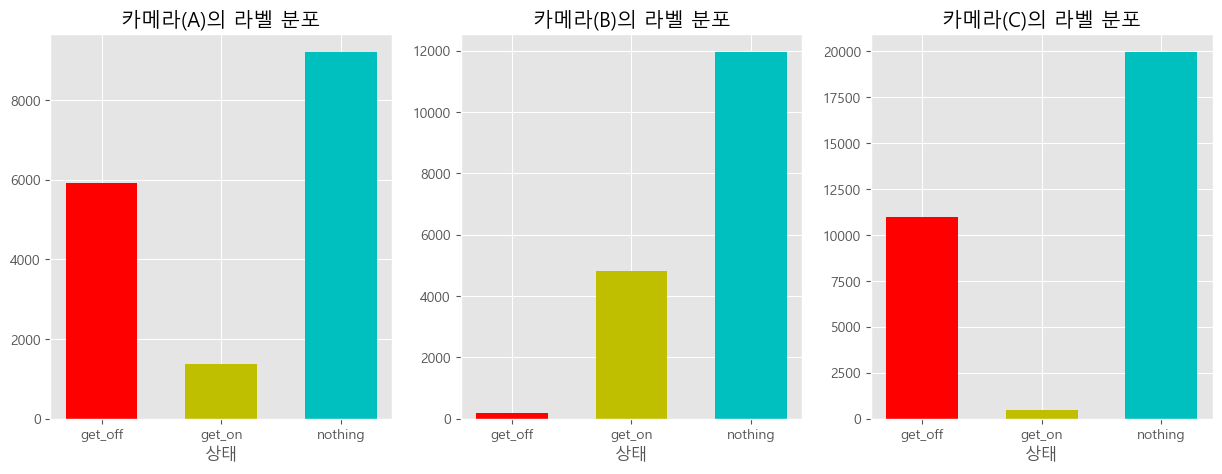

In [100]:
# 카메라(A/B/C) : 승하차 라벨 분포
plt.figure(figsize=[15,5])

plt.subplot(1, 3, 1)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_aa, cam_aa, color=['r','y','c'], label=label_aa, width=0.6)
plt.title('카메라(A)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1, 3, 2)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_aa, cam_bb, color=['r','y','c'], label=label_aa, width=0.6)
plt.title('카메라(B)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1, 3, 3)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_aa, cam_cc, color=['r','y','c'], label=label_aa, width=0.6)
plt.title('카메라(C)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.show()

### 6-2_이상행동 : 카메라(A~H)

In [101]:
import warnings
warnings.filterwarnings(action='ignore')

label_ddee = ['stand', 'walk', 'run', 'sit down', 'lay down', 'grab handle', 'kick', 'punch']
cam_dd = [len(df_dd_0), len(df_dd_1), len(df_dd_2), len(df_dd_3), len(df_dd_4), len(df_dd_5), len(df_dd_6), len(df_dd_7)]
cam_ee = [len(df_ee_0), len(df_ee_1), len(df_ee_2), len(df_ee_3), len(df_ee_4), len(df_ee_5), len(df_ee_6), len(df_ee_7)]

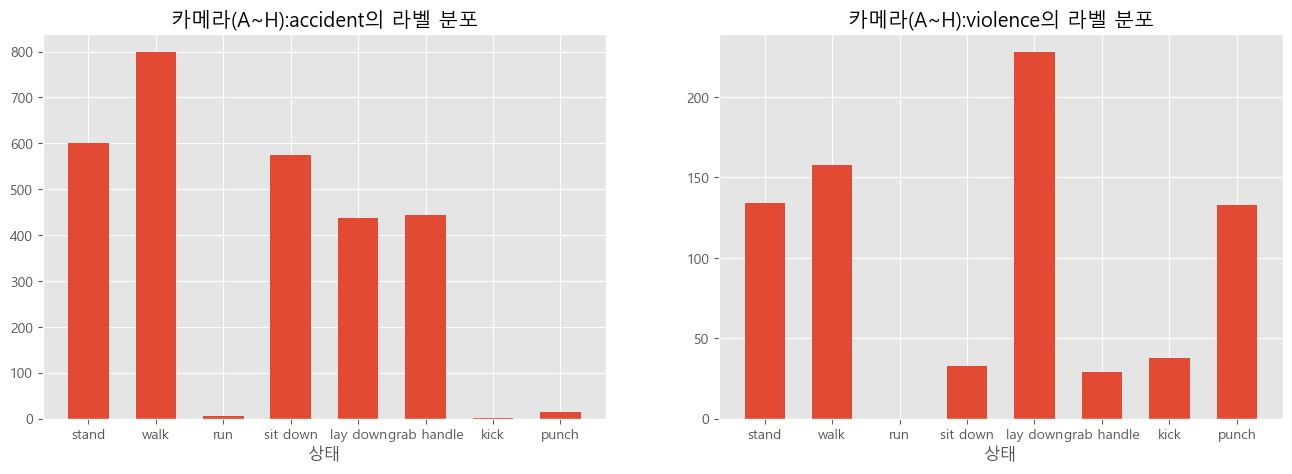

In [102]:
# 카메라(A~H) : 이상행동
plt.figure(figsize=[16,5])

plt.subplot(1, 2, 1)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_ddee, cam_dd, label=label_ddee, width=0.6)
plt.title('카메라(A~H):accident의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1, 2, 2)
plt.style.use('ggplot')
# plt.figure(figsize=[6,5])
plt.bar(label_ddee, cam_ee, label=label_ddee, width=0.6)
plt.title('카메라(A~H):violence의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.show()

## 7_데이터의 활용
---
* Training 데이터와 Validation 데이터의 분포를 봤을 때,  
    * 라벨 중 'run'이 가장 적긴 하지만, 버스안에서 뛰어다니는 경우가 많지는 않을 것으로 예상됨  
    * 그 외 다른 라벨들의 개수를 보았을 때, Training 데이터와 Validation 데이터를 합친 데이터를 사용해야 할 것으로 판단됨
    * 모델링을 할 때에는 개수를 줄이는 다운샘플링이 필요할 것으로 판단됨
    * 또한, 라벨 간 불균형적인 부분은 언더샘플링을 통해 해소하고, 교차분석을 진행해야할 것으로 판단됨

### 그래프 개별 모음

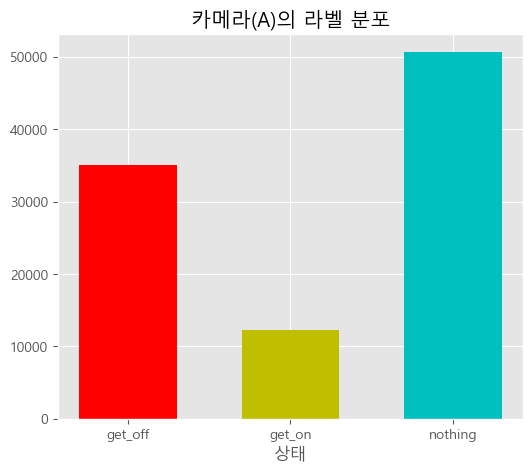

In [509]:
import warnings
warnings.filterwarnings(action='ignore')

label_a = ['get_off', 'get_on', 'nothing']
cam_a = [len(df_a_0) , len(df_a_1) , len(df_a_2)]

plt.style.use('ggplot')
plt.figure(figsize=[6,5])
plt.bar(label_a, cam_a, color=['r','y','c'], label=label_a, width=0.6)
plt.title('카메라(A)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

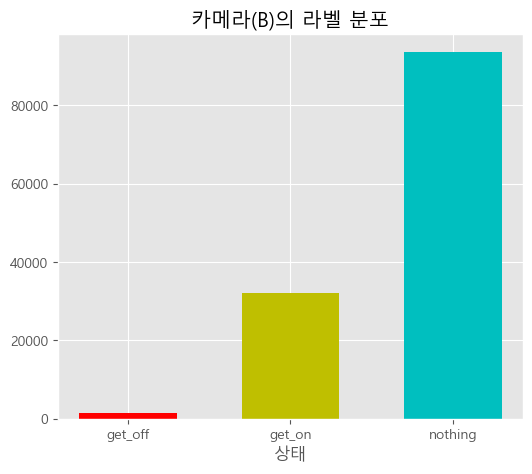

In [510]:
label_b = ['get_off', 'get_on', 'nothing']
cam_b = [len(df_b_0) , len(df_b_1) , len(df_b_2)]

plt.style.use('ggplot')
plt.figure(figsize=[6,5])
plt.bar(label_b, cam_b, color=['r','y','c'], label=label_b, width=0.6)
plt.title('카메라(B)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

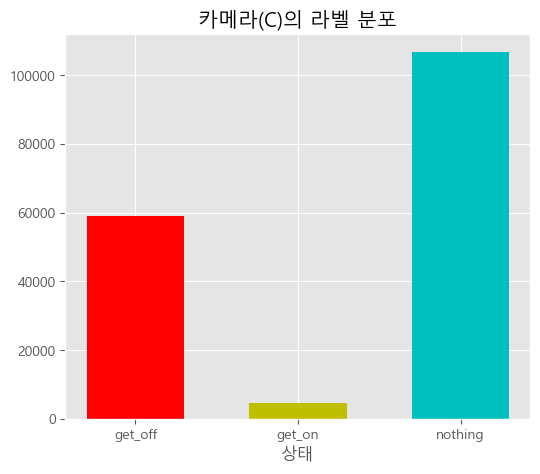

In [511]:
label_c = ['get_off', 'get_on', 'nothing']
cam_c = [len(df_c_0) , len(df_c_1) , len(df_c_2)]

plt.style.use('ggplot')
plt.figure(figsize=[6,5])
plt.bar(label_c, cam_c, color=['r','y','c'], label=label_c, width=0.6)
plt.title('카메라(C)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

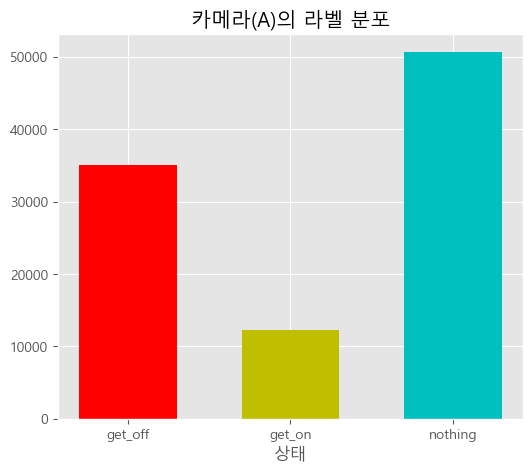

In [512]:
plt.style.use('ggplot')
plt.figure(figsize=[6,5])
plt.bar(label_a, cam_a, color=['r','y','c'], label=label_a, width=0.6)
plt.title('카메라(A)의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

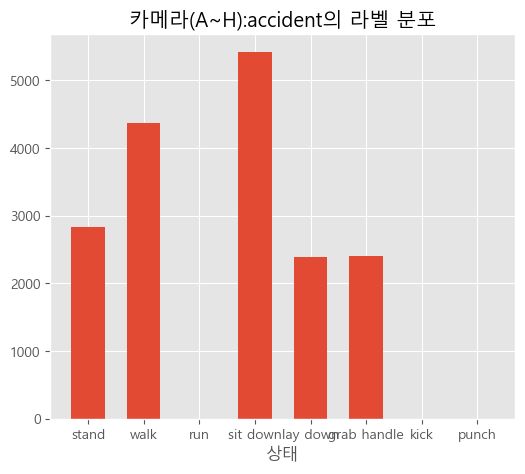

In [513]:
import warnings
warnings.filterwarnings(action='ignore')

label_d = ['stand', 'walk', 'run', 'sit down', 'lay down', 'grab handle', 'kick', 'punch']
cam_d = [len(df_d_0), len(df_d_1), len(df_d_2), len(df_d_3), len(df_d_4), len(df_d_5), len(df_d_6), len(df_d_7)]

plt.style.use('ggplot')
plt.figure(figsize=[6,5])
plt.bar(label_d, cam_d, label=label_d, width=0.6)
plt.title('카메라(A~H):accident의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

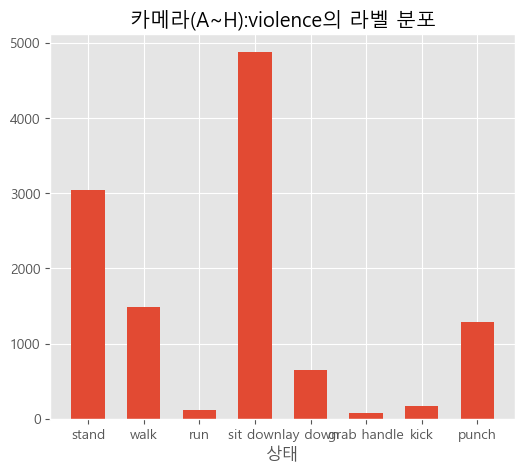

In [514]:
import warnings
warnings.filterwarnings(action='ignore')

label_e = ['stand', 'walk', 'run', 'sit down', 'lay down', 'grab handle', 'kick', 'punch']
cam_e= [len(df_e_0), len(df_e_1), len(df_e_2), len(df_e_3), len(df_e_4), len(df_e_5), len(df_e_6), len(df_e_7)]

plt.style.use('ggplot')
plt.figure(figsize=[6,5])
plt.bar(label_e, cam_e, label=label_e, width=0.6)
plt.title('카메라(A~H):violence의 라벨 분포')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

---